# Lending Club Historical Loan Data Set

Lending Club is a peer-to-peer lending service which allows investors to lend money to borrowers. An investor's return will vary, with a lot of variance coming from the default rate of the loans they invest in. As a result, an investor's ability to predict the likelihood of default of various borrowers will have a significant effect on their bottom line.

Lending Club provides historical data for loans made through the company in the past, through 2007. I'll conduct exploratory data analysis to investigate how feasible prediction of default rate would be.

## What do common types of loans in our data set look like?

First, import the data set and get some descriptive statistics. 

In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

%matplotlib inline
np.random.seed(12341234)


loans = pd.read_csv('lendingclub.csv', header=1)

loans.shape

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (0,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(42538, 150)

Our sample size is 42,538, and we have 150 different columns. To start off, let's look at the proportion of loans that are fully paid off:

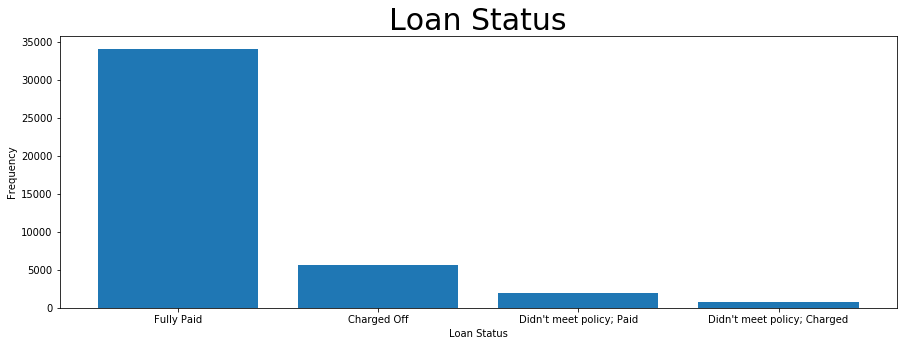

In [299]:
plt.figure(figsize=(15,5))

plt.bar(['Fully Paid', 'Charged Off', 'Didn\'t meet policy; Paid', 'Didn\'t meet policy; Charged'],loans.loan_status.value_counts())
plt.xlabel('Loan Status')
plt.ylabel('Frequency')
plt.title('Loan Status', size = 30)
plt.show()

In [300]:
loans.loan_status.value_counts()

Fully Paid                                             34116
Charged Off                                             5670
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Name: loan_status, dtype: int64

It looks like roughly 1/8 of loans that meet Lending Club's credit policy were fully paid off, along with 1/4 of loans that did not meet this policy.

Another field provides the purpose for the requested loans:

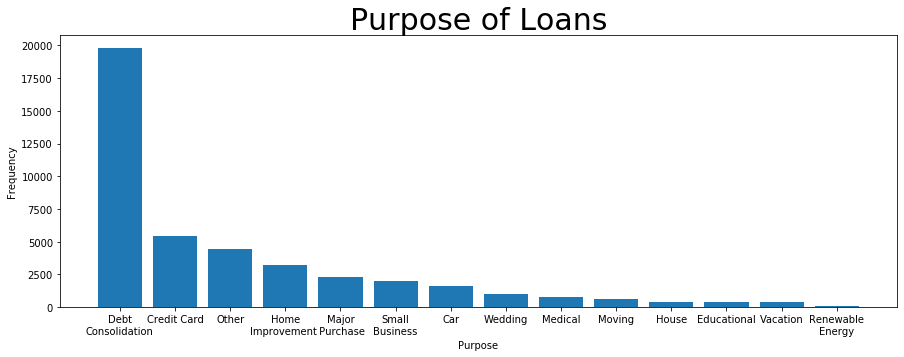

In [301]:
plt.figure(figsize=(15,5))

#loans.purpose.value_counts().plot(kind='bar')

plt.bar(['Debt\nConsolidation', 'Credit Card', 'Other', 'Home\nImprovement ', 'Major\n Purchase', 'Small\nBusiness', 'Car', 'Wedding', 'Medical', 'Moving', 'House', 'Educational', 'Vacation', 'Renewable\nEnergy']
        ,loans.purpose.value_counts())
plt.xlabel('Purpose')
plt.ylabel('Frequency')
plt.title('Purpose of Loans', size = 30)
plt.show()

In [302]:
loans.purpose.value_counts()

debt_consolidation    19776
credit_card            5477
other                  4425
home_improvement       3199
major_purchase         2311
small_business         1992
car                    1615
wedding                1004
medical                 753
moving                  629
house                   426
educational             422
vacation                400
renewable_energy        106
Name: purpose, dtype: int64

The vast majority of loans are for debt or credit card consolidation. Home improvement loans, consumer loans, or small business loans also make up a significant portion of the data. The next table investigates whether certain types of loans are more or less likely to be repaid.

In [303]:
loans_paid = loans[loans.loan_status == 'Fully Paid']
loans_charged = loans[loans.loan_status == 'Charged Off']
table = round(pd.Series(loans_charged.purpose).value_counts().sort_index()/(pd.Series(loans_paid.purpose).value_counts().sort_index()+pd.Series(loans_charged.purpose).value_counts().sort_index())*100,1)

labels = sorted(pd.Series(loans_charged.purpose).unique())

for i in range(14):
    #print('{}:\t\t{}%'.format(labels[i], str(round(table[i],1))))
    print(labels[i]+'\t'*(3 - len(labels[i])//8)+str(round(table[i],1))+'%')

car			10.3%
credit_card		10.7%
debt_consolidation	14.9%
educational		17.2%
home_improvement	11.8%
house			15.4%
major_purchase		10.1%
medical			15.3%
moving			15.8%
other			15.9%
renewable_energy	18.4%
small_business		26.2%
vacation		13.9%
wedding			10.1%


Interestingly, cars, credit cards, major purchases and weddings have the lowest default rates, but education, renewable energy, and small business loans default the most, with Lending Club small business loans defaulting more than 25% of the time.

## What are the characteristics of Lending Club borrowers?

Next, I look at the distribution of various factors of the borrowers we have data for; specifically, income, debt-to-income ratio, and credit score. The data set includes information on the highest and lowest FICO credit score for each borrower.

//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


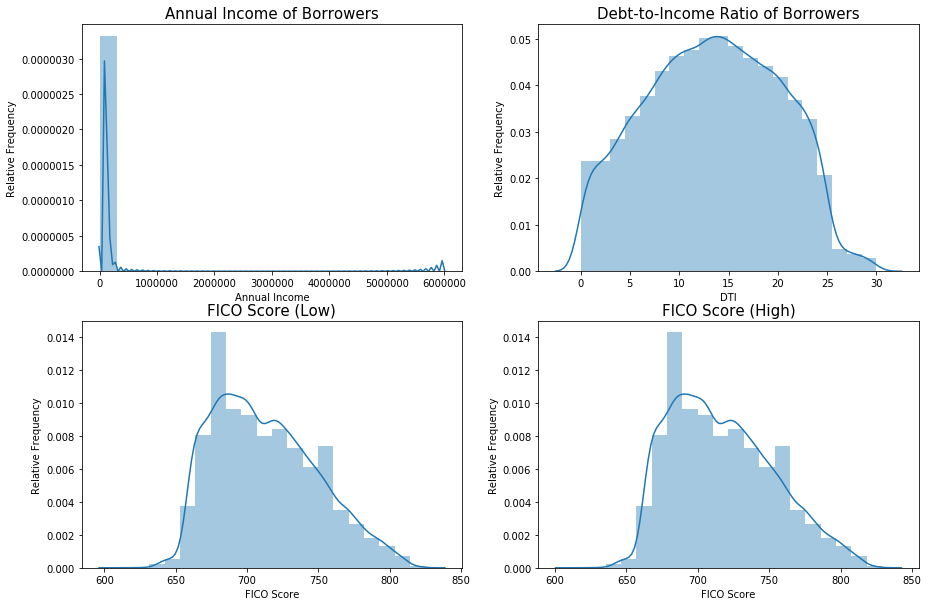

In [304]:
plt.figure(figsize = (15,10))
title_size = 15

plt.subplot(2,2,1)
sns.distplot(loans.annual_inc, bins=20, rug=False, label="length") 
plt.title('Annual Income of Borrowers', size=title_size)
plt.xlabel('Annual Income')
plt.ylabel('Relative Frequency')

plt.subplot(2,2,2)
sns.distplot(loans.dti, bins=20, rug=False, label="length") 
plt.title('Debt-to-Income Ratio of Borrowers', size = title_size)
plt.xlabel('DTI')
plt.ylabel('Relative Frequency')

plt.subplot(2,2,3)
sns.distplot(loans.fico_range_low, bins = 20, rug=False, label = 'length')
plt.title('FICO Score (Low)', size = title_size)
plt.xlabel('FICO Score')
plt.ylabel('Relative Frequency')

plt.subplot(2,2,4)
sns.distplot(loans.fico_range_high, bins = 20, rug=False, label = 'length')
plt.title('FICO Score (High)', size = title_size)
plt.xlabel('FICO Score')
plt.ylabel('Relative Frequency')

plt.show()

The distribution of annual incomes is pretty wide, but it's clear to see a majority of borrowers have income below \\$50,000. The next chart isolates incomes close to that range to get a clearer picture of the distribution.

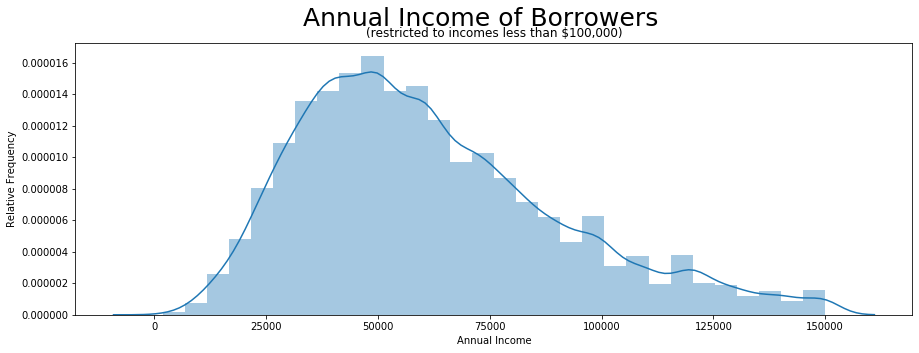

In [305]:
loans_cap_inc = loans[loans.annual_inc <= 150000]
plt.figure(figsize=(15,5))
sns.distplot(loans_cap_inc.annual_inc, bins=30, rug=False)
plt.suptitle('Annual Income of Borrowers', size=25)
plt.title('(restricted to incomes less than $100,000)')
plt.xlabel('Annual Income')
plt.ylabel('Relative Frequency')
plt.show()

That's a little easier to look at. The distribution of incomes appears to be skewed right, centered around approximately \\$50,000. We also want to know more information about the loans being given out. The next two charts look at the distribution of loan amounts and interest rates that were charged for the loans in the data set.

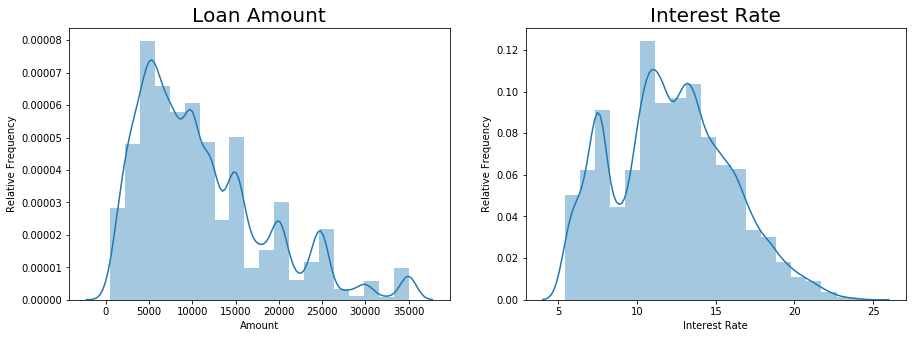

In [306]:
# The interest rate is currently a string in the format '12.45%'

# The following code removes the percentage symbol and formats the interest rate column as a decimal

def modify_int_rate(x):
    try:
        return float(str(x)[:-1])
    except:
        return np.nan

loans.int_rate = loans.int_rate.apply(lambda x: modify_int_rate(x))

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.distplot(loans.loan_amnt, bins=20, rug=False)
plt.title('Loan Amount', size=20)
plt.xlabel('Amount')
plt.ylabel('Relative Frequency')

#test = loans['int_rate']
plt.subplot(1,2,2)
sns.distplot(loans.int_rate, bins=20, rug=False)
plt.title('Interest Rate', size=20)
plt.xlabel('Interest Rate')
plt.ylabel('Relative Frequency')

plt.show()

Most loans in our data set were for less than \\$15,000, with the majority centered around \\$5,000. Interest rates ranged from 5-25%, with a large proportion between 10 and 15%.

## Can we use loan and borrower data to better predict who will default?

We want to start to get a better picture of how people that fully pay off their loans differ from those that default. The first 2 charts compare the income and dti distributions of the two groups. As we would probably expect, people that pay in full tend to have higher incomes and lower debt levels.

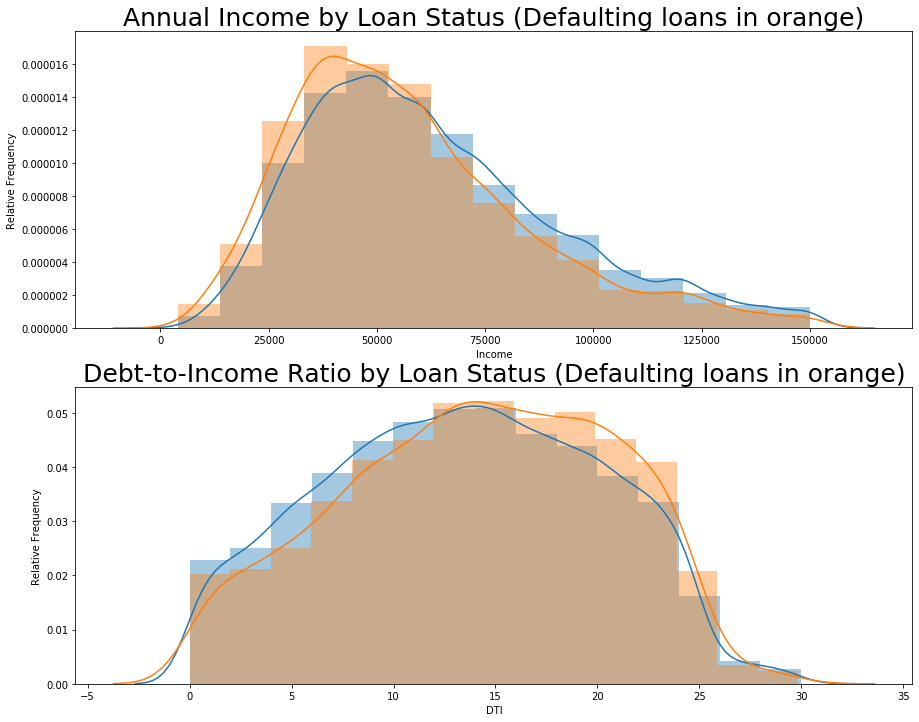

In [307]:
loans_capinc_paid = loans_cap_inc[loans_cap_inc.loan_status == 'Fully Paid']
loans_capinc_charged = loans_cap_inc[loans_cap_inc.loan_status == 'Charged Off']

plt.figure(figsize = (15,12))

plt.subplot(2,1,1)
sns.distplot(loans_capinc_paid.annual_inc, bins=15, rug=False)
sns.distplot(loans_capinc_charged.annual_inc, bins=15, rug=False)
plt.title('Annual Income by Loan Status (Defaulting loans in orange)', size = 25)
#plt.title('Defaulting loans in orange')
plt.xlabel('Income')
plt.ylabel('Relative Frequency')

plt.subplot(2,1,2)
sns.distplot(loans_capinc_paid.dti, bins=15, rug=False)
sns.distplot(loans_capinc_charged.dti, bins=15, rug=False)
plt.title('Debt-to-Income Ratio by Loan Status (Defaulting loans in orange)', size = 25)
#plt.title('Defaulting loans in orange')
plt.xlabel('DTI')
plt.ylabel('Relative Frequency')

plt.show()

Note that these distributions are normalized. So, while those with incomes less than \\$25,000 make up a greater proportion of the distribution of defaulting loans, it doesn't mean that a borrower making less than \\$25,000 is more likely than not to default. 

In [308]:
print("Total paid off loans to borrowers earning less than or equal to $25,000: ",loans_paid[loans_paid.annual_inc <= 25000].shape[0])
print("Total defaulted loans to borrowers earning less than or equal to $25,000: ",loans_charged[loans_charged.annual_inc <= 25000].shape[0])

Total paid off loans to borrowers earning less than or equal to $25,000:  2089
Total defaulted loans to borrowers earning less than or equal to $25,000:  488


A loan to someone making less than \\$25,000 per year is still paid approximately 80% of the time.

Overall, we can see that borrowers that pay off their loans in full tend to have higher incomes and lower levels of debt than their defaulting counterparts. Next, we want to start to investigate which factors can help predict likelihood of default. The next section separates a buyer's credit score into 9 "bins," or intervals of a certain variable, and charts the proportion of loans that were paid back for each bin.

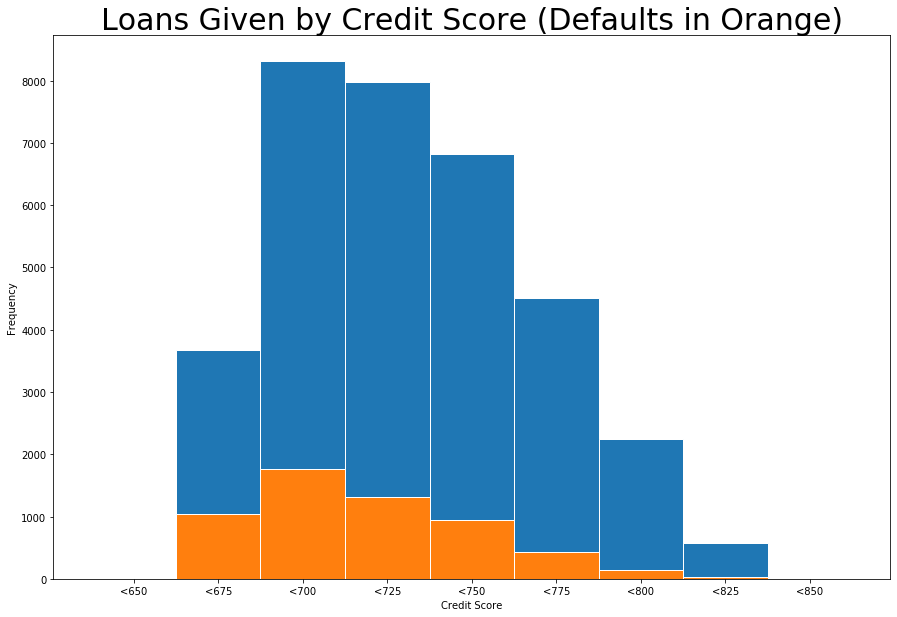

In [309]:
loans['fico_bin'] = loans.fico_range_high // 25

loans_paid = loans[loans.loan_status == 'Fully Paid']
loans_charged = loans[loans.loan_status == 'Charged Off']

paid_by_fico = pd.Series(loans_paid.fico_bin).value_counts().sort_index()
charged_by_fico = pd.Series(loans_charged.fico_bin).value_counts().sort_index()

charged_by_fico[25.0] = 0
charged_by_fico[33.0] = 0
charged_by_fico = charged_by_fico.sort_index()

plt.figure(figsize = (15,10))

plt.bar(['<650','<675','<700','<725','<750','<775','<800','<825','<850'],paid_by_fico, edgecolor='white', width=1)
plt.bar(['<650','<675','<700','<725','<750','<775','<800','<825','<850'],charged_by_fico, edgecolor='white', width=1)

plt.title('Loans Given by Credit Score (Defaults in Orange)', size=30)
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

As we would expect, those with credit scores default less often than those with low scores. Let's do the same with income.

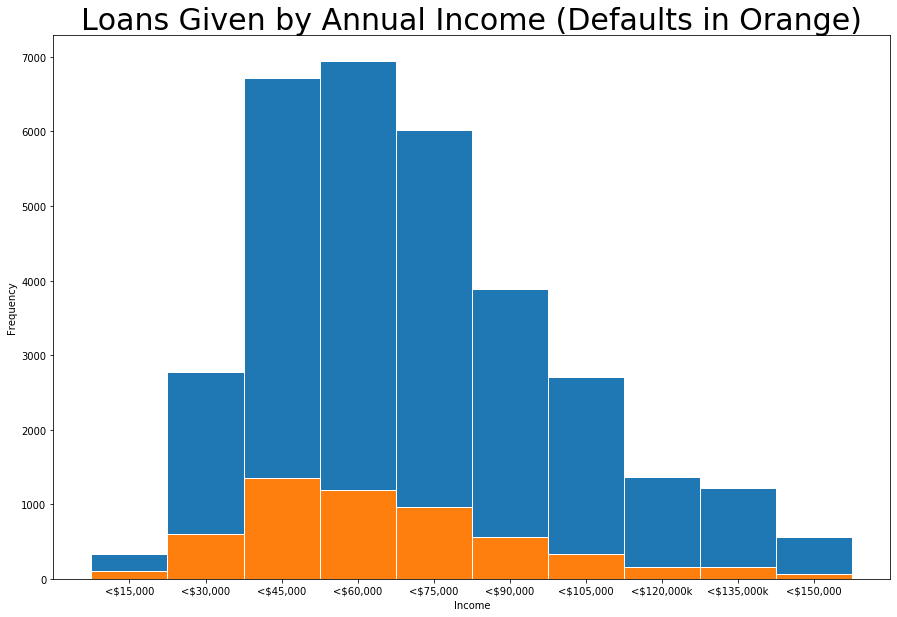

In [310]:
loans['income_bin'] = loans.annual_inc // 15000
loans_inc_chart = loans[loans.annual_inc < 150000]

loans_inc_chart_paid = loans_inc_chart[loans_inc_chart.loan_status == 'Fully Paid']
loans_inc_chart_charged = loans_inc_chart[loans_inc_chart.loan_status == 'Charged Off']

paid_by_inc = pd.Series(loans_inc_chart_paid.income_bin).value_counts().sort_index()
charged_by_inc = pd.Series(loans_inc_chart_charged.income_bin).value_counts().sort_index()

plt.figure(figsize=(15,10))

plt.bar(['<$15,000','<$30,000','<$45,000','<$60,000','<$75,000','<$90,000','<$105,000','<$120,000k','<$135,000k','<$150,000'],paid_by_inc, edgecolor='white', width=1)
plt.bar(['<$15,000','<$30,000','<$45,000','<$60,000','<$75,000','<$90,000','<$105,000','<$120,000k','<$135,000k','<$150,000'],charged_by_inc, edgecolor='white', width=1)

plt.title('Loans Given by Annual Income (Defaults in Orange)', size=30)
plt.xlabel('Income')
plt.ylabel('Frequency')

plt.show()

It looks like higher incomes have lower default rates, but it's a little difficult to interpret proportions on a graph like that. Let's Print a table of default rates just to make sure.

In [311]:
charged_by_inc/(paid_by_inc+charged_by_inc)

0.0    0.239631
1.0    0.177553
2.0    0.166935
3.0    0.146719
4.0    0.138587
5.0    0.125479
6.0    0.111221
7.0    0.101773
8.0    0.112655
9.0    0.101449
Name: income_bin, dtype: float64

We can definitely see, based on the chart, that default likelihood definitely decreases as income increases. 

## Can multiple variables used together provide more predictive power?

Now that it's been established that there are certain variables that help predict an individual's likelihood of default, we want to see if variables jointly do the same, to a greater or lesser degree than individual variables. The next chart looks at default rates when looking at both Income and DTI at the same time. We discard borrowers with incomes above \\$150,000 and debt-to-income ratios above 25 for sample size concerns.

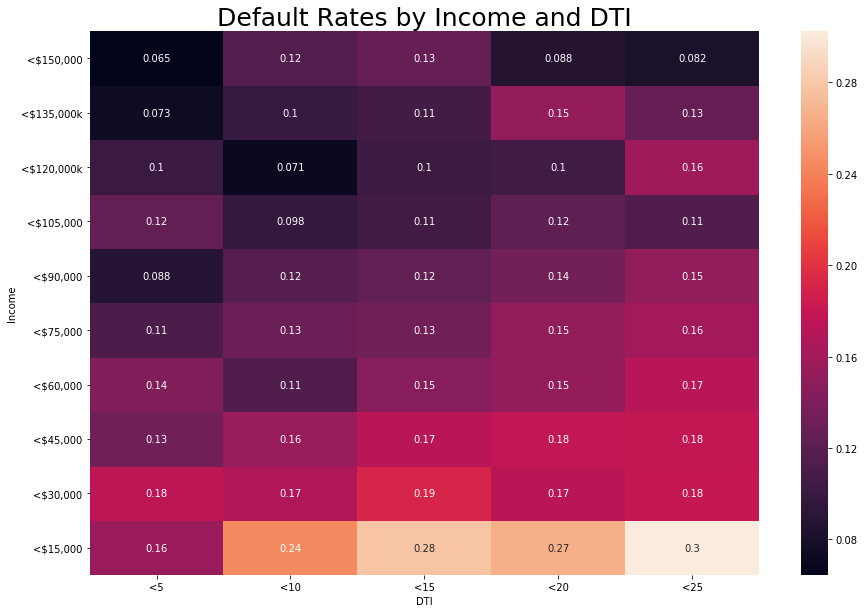

In [312]:
loans['dti_bin'] = loans.dti // 5
loans_inc_chart = loans[loans.annual_inc < 150000]
loans_inc_chart = loans_inc_chart[loans_inc_chart.dti < 25]
loans_inc_chart_paid = loans_inc_chart[loans_inc_chart.loan_status == 'Fully Paid']
loans_inc_chart_charged = loans_inc_chart[loans_inc_chart.loan_status == 'Charged Off']

ct1 = pd.crosstab(loans_inc_chart_paid.income_bin, loans_inc_chart_paid.dti_bin)
ct2 = pd.crosstab(loans_inc_chart_charged.income_bin, loans_inc_chart_charged.dti_bin)
ct_total = ct1+ct2

plt.figure(figsize=(15,10))
def_rate = ct2/ct_total
hm = sns.heatmap(def_rate, annot=True, xticklabels=['<5','<10','<15','<20','<25'], yticklabels=['<$15,000','<$30,000','<$45,000','<$60,000','<$75,000','<$90,000','<$105,000','<$120,000k','<$135,000k','<$150,000'])
plt.xlabel('DTI')
plt.ylabel('Income')
plt.title('Default Rates by Income and DTI', size=25)
hm1 = hm.invert_yaxis()
hm1

It does appear that these two variables considered jointly would have greater predictive power than each used individually. Lower income earners with high debt levels were considerably more likely to default than those with low debet levels, and we see this at middle and high incomes as well, albeit to a lesser extent.

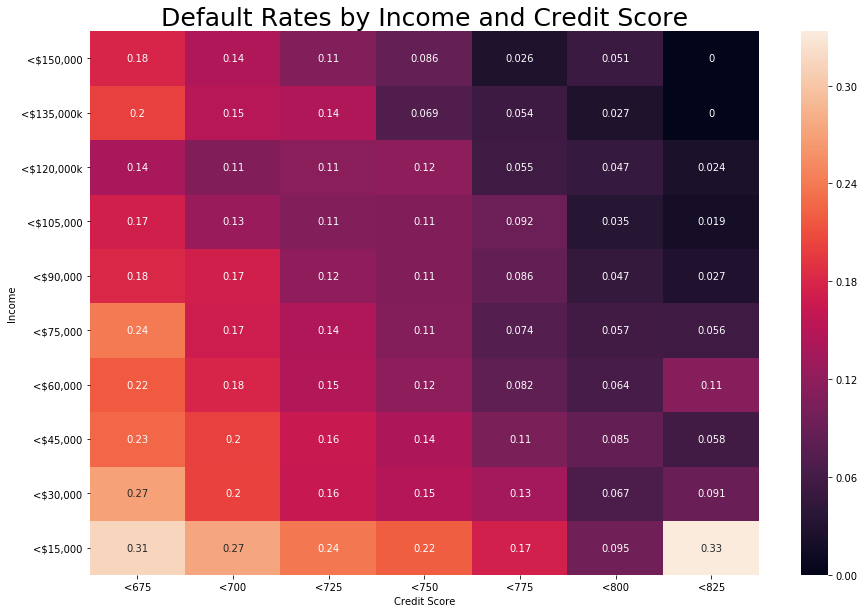

In [313]:
loans_creditchart_paid = loans_inc_chart_paid[loans_inc_chart_paid.fico_bin != 25.0]
loans_creditchart_paid = loans_creditchart_paid[loans_creditchart_paid.fico_bin != 33.0]

loans_creditchart_charged = loans_inc_chart_charged[loans_inc_chart_charged.fico_bin != 25.0]
loans_creditchart_charged = loans_creditchart_charged[loans_creditchart_charged.fico_bin != 33.0]

ct1 = pd.crosstab(loans_creditchart_paid.income_bin, loans_creditchart_paid.fico_bin)
ct2 = pd.crosstab(loans_creditchart_charged.income_bin, loans_creditchart_charged.fico_bin)
ct_total = ct1+ct2

plt.figure(figsize = (15,10))
def_rate = ct2/ct_total
hm = sns.heatmap(def_rate, annot=True, xticklabels=['<675','<700','<725','<750','<775','<800','<825'], yticklabels=['<$15,000','<$30,000','<$45,000','<$60,000','<$75,000','<$90,000','<$105,000','<$120,000k','<$135,000k','<$150,000'])
plt.xlabel('Credit Score')
plt.ylabel('Income')
plt.title('Default Rates by Income and Credit Score', size=25)
hm1 = hm.invert_yaxis()
hm1

The relationship here is even stronger. We should note that the bottom right cell, representing borrowers making less than \\%15,000 per year with a credit score of 800-825 has a sample size of 3. Overall, this chart suggests that using credit score and income together could have very strong predictive power over default rates.

## Can we build a portfolio that beats the market?

At the end of the day, recognizing this information is useless if we can't build a profitable portfolio. We're going to restrict our analysis to 36 month loans for this exercise, for a couple reasons. First, they make up a majority of the data. Second, they have drastically lower default rates than 60 month loans. And finally, as a practical concern, this will make computing annual returns drastically easier. The following code computes the average annual return, and the percentage of loans that were profitable. Essnetially, I want to know what my returns would be if I invested an equal amount into every loan in a portfolio, and what percentage of loans default.

In [314]:
# Create a class that will make it easier to pull certain pieces of data from 
# subsets of our loan data. 

class Portfolio:
    def __init__(self, loans):
        self.loans = loans
        self.avg_return = np.mean(self.loans.percent_return) ** (1/3) * 100 - 100
        self.pct_positive = np.mean(self.loans.pos_return)*100
    
    def avg_results(self):
        print('Annual Return: \t\t\t' + str(round(self.avg_return, 2)) + '%')
        print('Percent of Profitable Loans:\t' + str(round(self.pct_positive,1)) + '%')
        
    def random(self, s):
        # Return random selection of s loans from portfolio
        i = np.random.choice(range(len(self.loans)), s, replace = False)
        return self.loans.iloc[i]
        
    def simulate(self, s = 100, n = 100):
        # Simulate a portfolio of size s, n times. Print average return,
        # standard deviation of returns, and percent of simulations where the 
        # portfolio returned a positive value
        returns = []
        count = 0
        while count < n:
            temp = self.random(s)
            returns.append(np.mean(temp.percent_return) ** (1/3) * 100 - 100)
            count += 1
        avg_return = np.mean(returns)
        std = np.std(returns)
        pct_profitable = np.mean([x > 0 for x in returns])
        print('Average return: ' + str(round(avg_return,2)) + '%')
        print('Standard deviation of returns: '+ str(round(std,1)) + '%')
        print('Percent profitable portfolios: '+ str(round(pct_profitable*100,1)) + '%')

        
loans_portfolio = loans[loans.term == ' 36 months']
loans_portfolio['dollar_return'] = loans_portfolio.total_pymnt - loans_portfolio.funded_amnt
loans_portfolio['percent_return'] = 1 + loans_portfolio.dollar_return / loans_portfolio.funded_amnt
loans_portfolio['pos_return'] = loans_portfolio.percent_return > 1

p_whole = Portfolio(loans_portfolio)
p_whole.avg_results()

Annual Return: 			2.59%
Percent of Profitable Loans:	89.1%


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-v

The average return of all 36-month loans in the Lending Club data set is about 2.6% per year. It's promising that this number is positive, but I think we can do better. Let's use our final visualization to target low-default loans. We'll restrict our portfolio to borrowers making between \\$90,000 and \\$150,000 per year with a credit score above 775.

In [315]:
p1 = loans_portfolio[loans_portfolio.annual_inc <= 150000]
p1 = p1[p1.annual_inc > 90000]
p1 = Portfolio(p1[p1.fico_range_high > 775])

p1.avg_results()

Annual Return: 			2.45%
Percent of Profitable Loans:	97.7%


While our annual return remains about the same, we've significantly lowered the default rate of our portfolio. Essentially, we've maintained our return while significantly lowering our risk.

It's likely that borrowers with higher credit scores demand better interest rates. What happens if we remove the credit score restriction?

In [316]:
p2 = loans_portfolio[loans_portfolio.annual_inc <= 150000]
p2 = Portfolio(p2[p2.annual_inc > 90000])

p2.avg_results()

Annual Return: 			3.22%
Percent of Profitable Loans:	92.3%


This is extremely promising! Compared to a random selection of loans, restricting incomes of borrowers increases our returns while also decreasing our risk.

While 3.2% is a very good return for a low-risk portfolio, it's possible some investors would like to target higher risks and higher returns.

In [317]:
p3 = Portfolio(loans_portfolio[loans_portfolio.annual_inc <= 30000])

p3.avg_results()

Annual Return: 			1.6%
Percent of Profitable Loans:	84.8%


In [318]:
p4 = loans_portfolio[loans_portfolio.annual_inc <= 90000]
p4 = Portfolio(p4[p4.annual_inc > 30000])

p4.avg_results()

Annual Return: 			2.64%
Percent of Profitable Loans:	89.2%


Neither of these are very attractive. Let's try breaking it down further by credit score.

In [319]:
p5 = loans_portfolio[loans_portfolio.annual_inc <= 30000]
p5 = Portfolio(p5[p5.fico_range_high >= 725])

p5.avg_results()

Annual Return: 			1.64%
Percent of Profitable Loans:	89.8%


In [320]:
p6 = loans_portfolio[loans_portfolio.annual_inc <= 30000]
p6 = Portfolio(p6[p6.fico_range_high < 725])

p6.avg_results()

Annual Return: 			1.58%
Percent of Profitable Loans:	82.4%


In [321]:
p7 = Portfolio(p4.loans[p4.loans.fico_range_high >= 725])

p7.avg_results()

Annual Return: 			2.28%
Percent of Profitable Loans:	93.5%


In [322]:
p8 = Portfolio(p4.loans[p4.loans.fico_range_high < 725])

p8.avg_results()

Annual Return: 			2.85%
Percent of Profitable Loans:	86.7%


Nothing jumps out as being much better than our second portfolio. Finally, let's try high income borrower with low credit scores (a subset of this second portfolio.

In [323]:
p9 = Portfolio(p2.loans[p2.loans.fico_range_high < 725])

p9.avg_results()

Annual Return: 			3.69%
Percent of Profitable Loans:	89.8%


In [324]:
p10 = Portfolio(p2.loans[p2.loans.fico_range_high < 675])

p10.avg_results()

Annual Return: 			4.14%
Percent of Profitable Loans:	85.1%


It looks like high income earners with low credit scores can be a reasonable higher-risk, higher-reward portfolio.

Finally, let's look at portfolios constructed by loan grades to see if anything promising is revealed.

In [325]:
p11 = Portfolio(loans_portfolio[loans_portfolio.grade == 'A'])

p11.avg_results()

Annual Return: 			2.17%
Percent of Profitable Loans:	94.6%


In [326]:
p12 = Portfolio(loans_portfolio[loans_portfolio.grade == 'B'])

p12.avg_results()

Annual Return: 			2.8%
Percent of Profitable Loans:	90.2%


In [327]:
p13 = Portfolio(loans_portfolio[loans_portfolio.grade == 'C'])

p13.avg_results()

Annual Return: 			2.89%
Percent of Profitable Loans:	86.3%


In [328]:
p14 = Portfolio(loans_portfolio[loans_portfolio.grade == 'D'])

p14.avg_results()

Annual Return: 			2.89%
Percent of Profitable Loans:	83.0%


In [329]:
p15 = Portfolio(loans_portfolio[loans_portfolio.grade == 'E'])

p15.avg_results()

Annual Return: 			2.67%
Percent of Profitable Loans:	79.9%


In [330]:
p16 = Portfolio(loans_portfolio[loans_portfolio.grade == 'F'])

p16.avg_results()

Annual Return: 			0.89%
Percent of Profitable Loans:	72.9%


It doesn't appear that Lending Club's loan grades provide a better basis for investment than income- and credit- based criteria. 

In real life, it's not feasible to invest in every possible loan available. The next exercise simulates an investment portfolio of 20 loans, 1000 times, and looks at the average and standard deviation of returns, as well as the percentage of simulations where an investor would've made a profit.

First, using loans from our whole sample:

In [331]:
p_whole.simulate(s=20, n=1000)

Average return: 2.59%
Standard deviation of returns: 1.7%
Percent profitable portfolios: 91.6%


Next, a portfolio with only incomes between \\$90,000 and \\$150,000 and high credit scores:

In [332]:
p1.simulate(s=20, n=1000)

Average return: 2.47%
Standard deviation of returns: 0.8%
Percent profitable portfolios: 98.7%


High income earners, without a restriction on credit scores:

In [333]:
p2.simulate(s=20, n=1000)

Average return: 3.24%
Standard deviation of returns: 1.4%
Percent profitable portfolios: 97.9%


High income earners with credit scores below 725:

In [334]:
p9.simulate(s=20, n=1000)

Average return: 3.63%
Standard deviation of returns: 1.6%
Percent profitable portfolios: 97.6%


And finally, high income earners with credit scores below 675:

In [335]:
p10.simulate(s=20, n=1000)

Average return: 4.09%
Standard deviation of returns: 1.8%
Percent profitable portfolios: 97.9%


As our earlier results would suggest, our exploratory data analysis was able to give us enough insight to significantly outperform the market. We created multiple portfolios with similar returns and less variance or risk of loss than random selection.

## Further Research

Going forward, it will be exciting to see if we can improve on these results using different regression or machine learning techniques. Additionally, it would be interesting to look at mixed portfolios, where investment is split proportionally by different criteria (say, 70\% low risk loans and 30\% higher risk, higher return loans). I also think it'd be beneficial to perform out-of-sample testing, to see if these results persisted for future years.